# Capstone Webscrapping using BeautifulSoup

This notebook contains guidances & tasks on the data processing for the application

## background

US Dollar (USD) To Indonesian Rupiah (IDR) Exchange Rate History, adalah Data pergerakan Nilai Rupiah terhadap US Dollar sejak tanggal 14 November 2022 yang bersumber dari 'https://www.exchange-rates.org/history/IDR/USD/T' .

Pengambilan Data dari sumber tersebut diambil secara webscrapping dengan menggunakan Beutiful Soup dan divisualisasikan dalam Flask Dashboard  yang terdiri dari Profile/Trend Pergerakan Kurs dan Frekuensi/Sebaran Nilai Kurs tsb

Environment yang digunakan dalam pengerjaan webscrapping ini adalah vulcan_da yg sdh mencakup library yang diperlukan yaitu : beautifulsoup4, Flask, matplotlib, pandas, Pillow, dan requests. Library library pada environment vulcan_da tsb terangkum keseluruhannya pada file requirements2.txt

## Requesting the Data and Creating a BeautifulSoup

Let's begin with requesting the web from the site with `get` method.

In [54]:
import requests

url_get = requests.get('https://www.exchange-rates.org/history/IDR/USD/T')

To visualize what exactly you get from the `request.get`, we can use .content so ee what we exactly get, in here i slice it so it won't make our screen full of the html we get from the page. You can delete the slicing if you want to see what we fully get.

In [55]:
url_get.content[1:500]

b'!DOCTYPE html>\r\n<!--[if lt IE 9]>\r\n<html class="no-js ie8 oldie" lang="en" xml:lang=\'en\'>\r\n<![endif]-->\r\n<!--[if gt IE 8]><!--><html class="no-js" lang="en" xml:lang=\'en\'><!--<![endif]-->\r\n<head>\r\n<title>USD to IDR exchange rate history</title>\r\n<meta http-equiv="X-UA-Compatible" content="IE=edge">\r\n<meta name="viewport" content="width=device-width, initial-scale=1, maximum-scale=5">\r\n<meta charset="utf-8" /><meta http-equiv="Content-Type" content="text/html; charset=utf-8" />\r\n<base href="http'

As we can see we get a very unstructured and complex html, which actually contains the codes needed to show the webpages on your web browser. But we as human still confused what and where we can use that piece of code, so here where we use the beautifulsoup. Beautiful soup class will result a beautifulsoup object. Beautiful Soup transforms a complex HTML document into a complex tree of Python objects. 

Let's make Beautiful soup object and feel free to explore the object here.

In [56]:
from bs4 import BeautifulSoup 

soup = BeautifulSoup(url_get.content,"html.parser")
print(type(soup))

<class 'bs4.BeautifulSoup'>


In [57]:
print(soup.prettify()[1:500])

!DOCTYPE html>
<!--[if lt IE 9]>
<html class="no-js ie8 oldie" lang="en" xml:lang='en'>
<![endif]-->
<!--[if gt IE 8]><!-->
<html class="no-js" lang="en" xml:lang="en">
 <!--<![endif]-->
 <head>
  <title>
   USD to IDR exchange rate history
  </title>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta content="width=device-width, initial-scale=1, maximum-scale=5" name="viewport"/>
  <meta charset="utf-8">
   <meta content="text/html; charset=utf-8" http-equiv="Content-Type">
   


## Finding the right key to scrap the data & Extracting the right information

Find the key and put the key into the `.find()` Put all the exploring the right key at this cell. (please change this markdown with your explanation)

In [58]:
table = soup.find('table', attrs= {'class':'history-rates-data'})
print(table.prettify()[1:500])

table border="0" cellpadding="0" cellspacing="0" class="history-rates-data">
 <thead>
  <tr>
   <th class="ltr-bidi-fix">
    Date
   </th>
   <th class="ltr-bidi-fix">
    US Dollar to Indonesian Rupiah
   </th>
  </tr>
 </thead>
 <tbody>
  <tr>
   <td>
    <a class="w" href="/exchange-rate-history/usd-idr-2023-05-12">
     May 12, 2023
    </a>
    <a class="n" href="/exchange-rate-history/usd-idr-2023-05-12">
     2023-5-12
    </a>
   </td>
   <td>
    <span class="w">
     <span class="now


Finding row length.

In [59]:
table.find_all('a', attrs= {'class':'n'})[0:10]

[<a class="n" href="/exchange-rate-history/usd-idr-2023-05-12">2023-5-12</a>,
 <a class="n" href="/exchange-rate-history/usd-idr-2023-05-11">2023-5-11</a>,
 <a class="n" href="/exchange-rate-history/usd-idr-2023-05-10">2023-5-10</a>,
 <a class="n" href="/exchange-rate-history/usd-idr-2023-05-09">2023-5-9</a>,
 <a class="n" href="/exchange-rate-history/usd-idr-2023-05-08">2023-5-8</a>,
 <a class="n" href="/exchange-rate-history/usd-idr-2023-05-05">2023-5-5</a>,
 <a class="n" href="/exchange-rate-history/usd-idr-2023-05-04">2023-5-4</a>,
 <a class="n" href="/exchange-rate-history/usd-idr-2023-05-03">2023-5-3</a>,
 <a class="n" href="/exchange-rate-history/usd-idr-2023-05-02">2023-5-2</a>,
 <a class="n" href="/exchange-rate-history/usd-idr-2023-05-01">2023-5-1</a>]

In [60]:
table.find_all('span', attrs= {'class':'nowrap'})[0:10]

[<span class="nowrap"><span class="currencySymbol">$</span>1 =</span>,
 <span class="nowrap"><span class="currencySymbol">Rp</span>14,844</span>,
 <span class="nowrap"><span class="currencySymbol">$</span>1 =</span>,
 <span class="nowrap"><span class="currencySymbol">Rp</span>14,844</span>,
 <span class="nowrap"><span class="currencySymbol">$</span>1 =</span>,
 <span class="nowrap"><span class="currencySymbol">Rp</span>14,776</span>,
 <span class="nowrap"><span class="currencySymbol">$</span>1 =</span>,
 <span class="nowrap"><span class="currencySymbol">Rp</span>14,776</span>,
 <span class="nowrap"><span class="currencySymbol">$</span>1 =</span>,
 <span class="nowrap"><span class="currencySymbol">Rp</span>14,698</span>]

In [61]:
Date = table.find_all('a', attrs= {'class':'n'})
row_length = len(Date)
print(row_length)

130


In [62]:
table.find_all('a', attrs= {'class':'n'})[0].text

'2023-5-12'

In [63]:
table.find_all('span', attrs= {'class':'n'})[0].text

'$1 = Rp14,844'

In [64]:
#table.find_all('span', attrs= {'class':'nowrap'})[3].text

In [65]:
table.find_all('span', attrs= {'class':'n'})[0].text

'$1 = Rp14,844'

Do the scrapping process here (please change this markdown with your explanation)

In [66]:
temp = [] #initiating a tuple

for i in range(0, row_length):

    #get-date
    Date = table.find_all('a', attrs= {'class':'n'})[i].text

    # get Dollar to Indonesian Rupiah
    US_Dollar_to_Indonesian_Rupiah = table.find_all('span', attrs= {'class':'n'})[i].text
    US_Dollar_to_Indonesian_Rupiah = US_Dollar_to_Indonesian_Rupiah.strip()

    temp.append((Date,US_Dollar_to_Indonesian_Rupiah))

temp 

[('2023-5-12', '$1 = Rp14,844'),
 ('2023-5-11', '$1 = Rp14,776'),
 ('2023-5-10', '$1 = Rp14,698'),
 ('2023-5-9', '$1 = Rp14,776'),
 ('2023-5-8', '$1 = Rp14,744'),
 ('2023-5-5', '$1 = Rp14,675'),
 ('2023-5-4', '$1 = Rp14,699'),
 ('2023-5-3', '$1 = Rp14,680'),
 ('2023-5-2', '$1 = Rp14,747'),
 ('2023-5-1', '$1 = Rp14,677'),
 ('2023-4-28', '$1 = Rp14,674'),
 ('2023-4-27', '$1 = Rp14,691'),
 ('2023-4-26', '$1 = Rp14,841'),
 ('2023-4-25', '$1 = Rp14,940'),
 ('2023-4-24', '$1 = Rp14,934'),
 ('2023-4-21', '$1 = Rp14,936'),
 ('2023-4-20', '$1 = Rp14,954'),
 ('2023-4-19', '$1 = Rp14,995'),
 ('2023-4-18', '$1 = Rp14,889'),
 ('2023-4-17', '$1 = Rp14,850'),
 ('2023-4-14', '$1 = Rp14,782'),
 ('2023-4-13', '$1 = Rp14,722'),
 ('2023-4-12', '$1 = Rp14,835'),
 ('2023-4-11', '$1 = Rp14,915'),
 ('2023-4-10', '$1 = Rp14,950'),
 ('2023-4-7', '$1 = Rp14,941'),
 ('2023-4-6', '$1 = Rp14,931'),
 ('2023-4-5', '$1 = Rp14,960'),
 ('2023-4-4', '$1 = Rp14,957'),
 ('2023-4-3', '$1 = Rp14,922'),
 ('2023-3-31', '$1 = R

## Creating data frame & Data wrangling

Put the array into dataframe

In [67]:
import pandas as pd

df = pd.DataFrame(temp, columns=('Date','US_Dollar_to_Indonesian_Rupiah'))


In [68]:
df['US_Dollar_to_Indonesian_Rupiah'] = df['US_Dollar_to_Indonesian_Rupiah'].str.replace("$1 = Rp"," ")



In [69]:
df['US_Dollar_to_Indonesian_Rupiah'] = df['US_Dollar_to_Indonesian_Rupiah'].str.replace(",","")


In [70]:
df['US_Dollar_to_Indonesian_Rupiah'] = df['US_Dollar_to_Indonesian_Rupiah'].astype('int64')


Do the data cleaning here (please change this markdown with your explanation of what you do for data wrangling)

In [71]:

df['Date'] = df['Date']. astype('datetime64[ns]')

In [72]:
df.dtypes

Date                              datetime64[ns]
US_Dollar_to_Indonesian_Rupiah             int64
dtype: object

In [73]:
df.head()

,Date,US_Dollar_to_Indonesian_Rupiah
0,2023-05-12,14844
1,2023-05-11,14776
2,2023-05-10,14698
3,2023-05-09,14776
4,2023-05-08,14744


Data visualisation (please change this markdown with your explanation of what you do for data wrangling)

In [74]:
df = df.set_index('Date')

<Axes: xlabel='Date'>

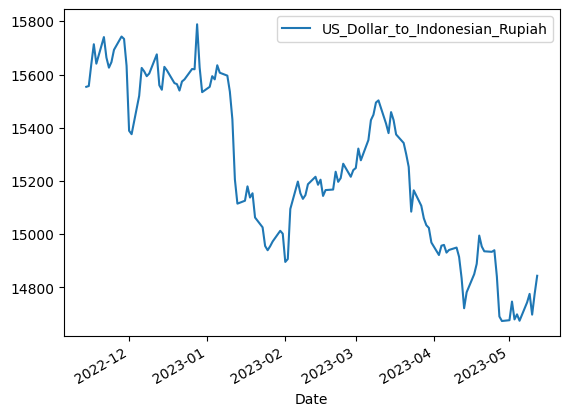

In [75]:
df.plot() # Membuat Plot Trend Pergerakan Nilai Rupiah terhadap US Dollar

<Axes: ylabel='Frequency'>

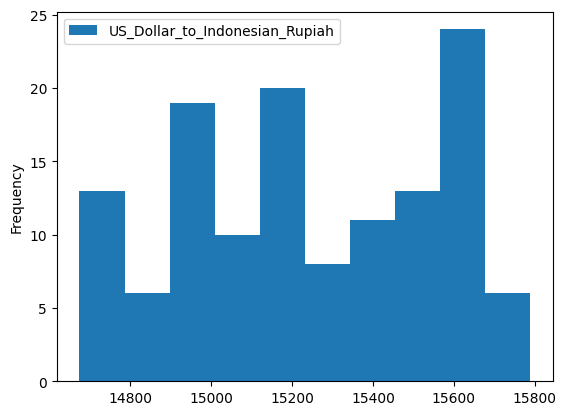

In [76]:
df.plot(kind='hist') # Membuat Plot Distribusi/Frekuensi Nilai Rupiah terhadap US Dollar

## Kesimpulan

Kesimpulan yang dapat diambil dari Data Frame (Tabel) dan kedua Plot diatas adalah :
1. Nilai US Dollar tertinggi thd Rupiah adalah pada tanggal 28 Desember 2022 yaitu sebesar Rp 15,789
2. Nilai rata-rata US Dollar thd Rupiah adalah sebesar Rp 15,241 atau 15,240.88
3. Nilai US Dollar terendah thd Rupiah adalah pada tanggal 28 April 2022 yaitu sebesar Rp 14,674
4. Jumlah Frekuensi terbanyak Nilai US Dollar thd Rupiah yaitu pada kisaran Nilai Rp 15,600
5. Jumlah Frekuensi paling sedikit Nilai US Dollar thd Rupiah yaitu pada kisaran Nilai Rp 14,800 serta Rp 15,600
6. Visualisasi dari Trend dan Frekuensi Nilai Rupiah terhadap US Dollar dapat dilihat pada Flask Dashboard atau file fd_1 dan fd_2

Beberapa penyebab terjadinya fluktuasi nilai tukar rupiah terhadap US Dollar tersebut antara lain karena adanya perubahan tingkat inflasi, kebijakan moneter dan Neraca Perdagangan Internasional